In [1]:
import numpy as np
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader
import datetime
import pandas_datareader.data as web
from scipy.stats import norm
import yfinance as yf
import cufflinks as cf
cf.go_offline()
df = pd.read_csv("//Users//sjacob//stocks//QUALITYGROWTHVALJULY2022.csv", index_col = False)

In [2]:
df

,Unnamed: 0,Ticker,Cov_mar,Market_var,Beta,Volatility%,Return%,CV,Sharp Ratio,CAGR,MAXDD%,Value at Risk
0,32,TANLA.NS,0.025030,0.032572,0.768453,55.524820,55.579640,99.901366,0.910937,74.280769,56.960481,32435.337833
1,19,TIPSINDLTD.NS,0.018430,0.032572,0.565816,55.804354,47.774559,116.807681,0.766509,61.202088,64.789129,46418.176812
2,45,PRIMESECU.NS,0.028180,0.032572,0.865161,63.824334,42.669480,149.578420,0.590206,53.183333,59.472419,68372.941435
3,6,ALKYLAMINE.NS,0.028812,0.032572,0.884575,43.122202,40.724386,105.887912,0.828445,50.234135,45.536652,25473.150480
4,26,POLYCAB.NS,0.046025,0.032572,1.413037,38.746019,39.156995,98.950440,0.881561,18.453503,49.828919,16834.886161
5,8,SUMICHEM.NS,0.047680,0.032572,1.463853,41.174357,34.828680,118.219688,0.724448,12.233198,41.454014,32480.926515
6,33,COFORGE.NS,0.032541,0.032572,0.999059,43.364916,32.096869,135.106376,0.624857,37.822444,56.758068,42954.142743
7,30,ADFFOODS.NS,0.031292,0.032572,0.960711,46.173523,31.749611,145.430198,0.579328,37.344932,62.070967,49518.909059
8,50,CAPLIPOINT.NS,0.029114,0.032572,0.893847,51.936693,31.328936,165.778671,0.506943,36.768678,74.085833,60546.514172
9,20,CDSL.NS,0.029663,0.032572,0.910694,38.878321,30.595262,127.073011,0.658343,22.760560,57.607431,34362.387069


In [3]:
df=df.drop(['Unnamed: 0'],axis=1)

In [4]:
df1 = df.sort_values(by='CV', ascending=True)
df1.reset_index(inplace = True)

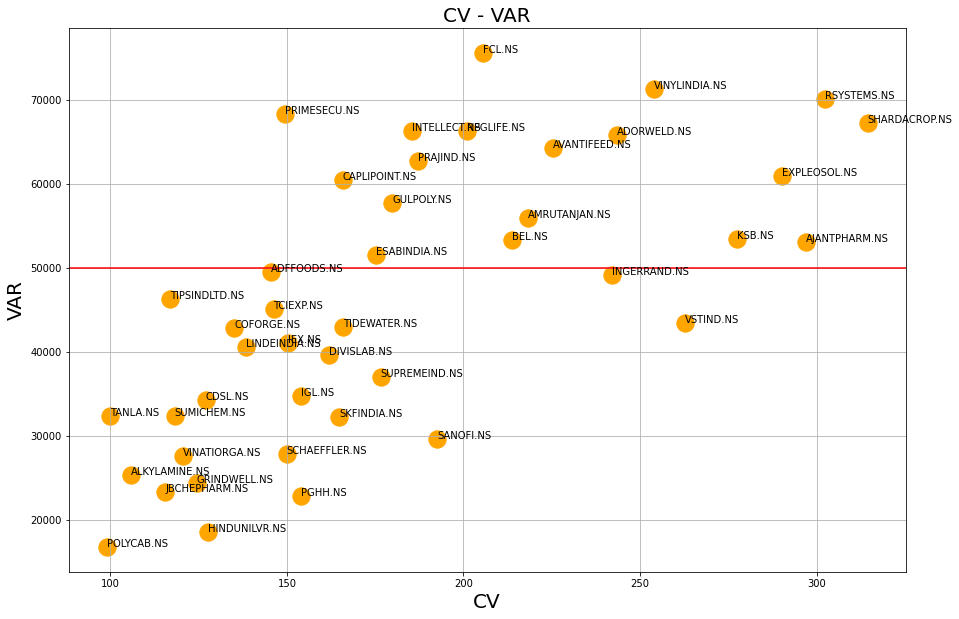

In [5]:

plt.figure(figsize=[15,10])
x= df1['CV']
y = df1['Value at Risk']
annotations = np.array(df1["Ticker"])
plt.grid(True)
plt.title('CV - VAR', fontsize=20, color='black')
plt.xlabel("CV",fontsize=20, color='black')
plt.ylabel("VAR", fontsize=20, color='black') 
plt.scatter(x, y,s=300,c='orange' )
i=0
for labels in annotations:
    plt.annotate(labels, (x[i], y[i]))
    i=i+1
#plt.axvline(x = 50, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()


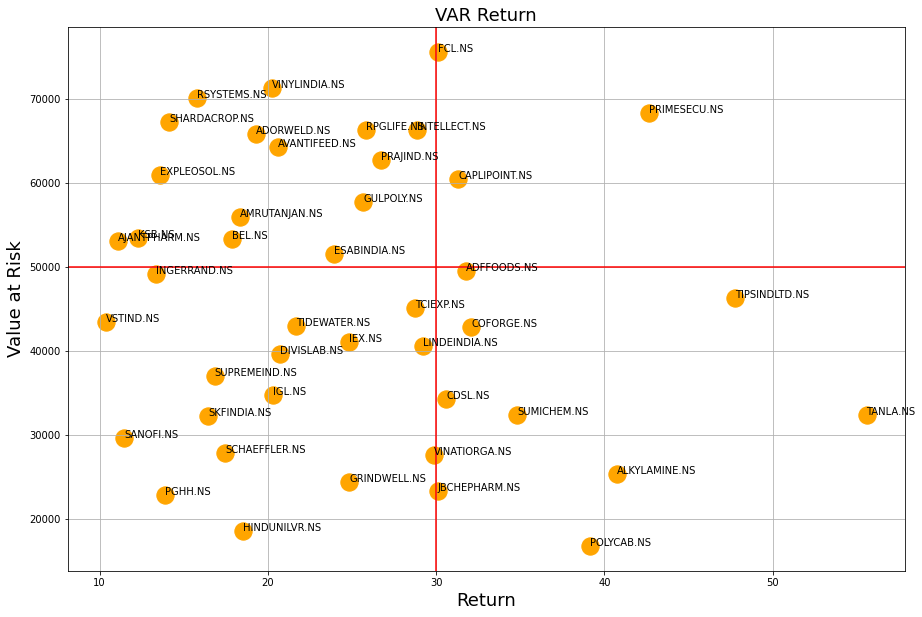

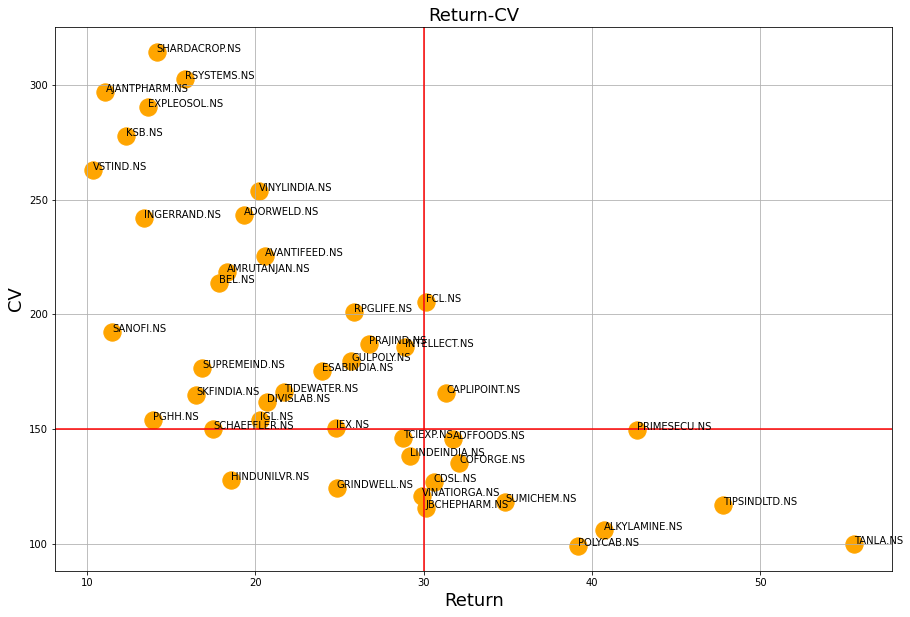

In [6]:
plt.figure(figsize=[15,10])
x= df1['Return%']
y = df1['Value at Risk']
annotations = df1["Ticker"]
plt.grid(True)
plt.title('VAR Return', fontsize=18, color='black')
plt.xlabel("Return",fontsize=18, color='black')
plt.ylabel("Value at Risk", fontsize=18, color='black') 
plt.scatter(x, y,s=300,c='orange' )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))

plt.axvline(x = 30, color = 'r', label = 'axvline - full height')
plt.axhline(y=50000, color='r', linestyle='-')
plt.show()



plt.figure(figsize=[15,10])
x= df1['Return%']
y = df1['CV']
annotations = df1["Ticker"]
plt.grid(True)
plt.title('Return-CV', fontsize=18, color='black')
plt.xlabel("Return",fontsize=18, color='black')
plt.ylabel("CV", fontsize=18, color='black') 
plt.scatter(x, y,s=300,c='orange' )
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))

plt.axvline(x = 30, color = 'r', label = 'axvline - full height')
plt.axhline(y=150, color='r', linestyle='-')
plt.show()

In [7]:
np.corrcoef(df1['CV'], df1['Value at Risk'])[0][1]

0.6783269286009389

In [8]:
def t_stat_corr(df, x, y):
    """Returns the t-statistic for the correlation between 2 variables"""
    corr_xy = np.corrcoef(df[x], df[y])[0][1]
    n = len(df)
    
    t_stat = (corr_xy * np.sqrt(n - 2)) / np.sqrt(1 - corr_xy ** 2)
    
    return t_stat

In [9]:
# H1
t_stat_corr(df=df1, y='Value at Risk', x='CV')

5.911332011596309

In [10]:
t_stat_corr(df=df1, y='Return%', x='CV')

-6.323464687468352

In [11]:
t_stat_corr(df=df1, y='Volatility%', x='Return%')

5.078304042174286

In [12]:

t_stat_corr(df=df1, y='Volatility%', x='CV')

0.14403883472574144

In [13]:

t_stat_corr(df=df1, y='Volatility%', x='MAXDD%')

6.384151187573015

In [14]:

t_stat_corr(df=df1, y='Return%', x='MAXDD%')

0.5515203870136818

In [15]:

df1.iplot(kind="scatter",
              x="CV", y='Value at Risk',
              mode='markers',
              xTitle="CV", yTitle="Value at Risk",
              title="========CV-------VAR=========================", categories="Ticker",theme="solar")

/Users/sjacob/Library/Python/3.8/lib/python/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

/Users/sjacob/Library/Python/3.8/lib/python/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



In [16]:

df1.iplot(kind="scatter",
              x="Return%", y='Volatility%',
              mode='markers',
              xTitle="Return", yTitle="Volatility",
              title="========Return-------Volatility=========================", categories="Ticker",theme="solar")

In [17]:

df1.iplot(kind="scatter",
              x="Return%", y='CV',
              mode='markers',
              xTitle="Return", yTitle="CV",
              title="========Return-------CV========================", categories="Ticker",theme="solar")

In [18]:

df1.iplot(kind="scatter",
              x="Volatility%", y='Value at Risk',
              mode='markers',
              xTitle="Volatility", yTitle="VAR",
              title="========VOL------VAR========================", categories="Ticker",theme="solar")

In [19]:

df1.iplot(kind="scatter",
              x="Return%", y='Value at Risk',
              mode='markers',
              xTitle="Return", yTitle="VAR",
              title="========Return------VAR========================", categories="Ticker",theme="solar")